In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] =False

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('서울시 상권분석서비스(소득소비-행정동).csv',encoding='cp949')
df.tail(2)

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
10198,20243,11680640,역삼1동,3607265,7,462852749000,2875360000,1065433000,347696000,10855447000,217119000,2313910000,1022743000,376215448000,60753193000,7186400000
10199,20243,11680655,도곡1동,5412484,9,12575577000,358391000,16057000,36620000,3905612000,251401000,187397000,19650000,7053322000,91994000,655133000


In [3]:
# 동네에서 가장 자주 소비하는 카테고리?
#  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   기준_년분기_코드     10200 non-null  int64 
 1   행정동_코드        10200 non-null  int64 
 2   행정동_코드_명      10200 non-null  object
 3   월_평균_소득_금액    10200 non-null  int64 
 4   소득_구간_코드      10200 non-null  int64 
 5   지출_총금액        10200 non-null  int64 
 6   식료품_지출_총금액    10200 non-null  int64 
 7   의류_신발_지출_총금액  10200 non-null  int64 
 8   생활용품_지출_총금액   10200 non-null  int64 
 9   의료비_지출_총금액    10200 non-null  int64 
 10  교통_지출_총금액     10200 non-null  int64 
 11  교육_지출_총금액     10200 non-null  int64 
 12  유흥_지출_총금액     10200 non-null  int64 
 13  여가_문화_지출_총금액  10200 non-null  int64 
 14  기타_지출_총금액     10200 non-null  int64 
 15  음식_지출_총금액     10200 non-null  int64 
dtypes: int64(15), object(1)
memory usage: 1.2+ MB


In [5]:
# 동별 소득소비 합계
df2 = df.groupby(by='행정동_코드',as_index=False)[['월_평균_소득_금액','지출_총금액','식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액',
       '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액', '기타_지출_총금액', '음식_지출_총금액']].sum()
df2

,행정동_코드,월_평균_소득_금액,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,11110515,91431684,58743841000,17827749000,4590105000,823623000,2588719000,631145000,1191848000,1703031000,6176510000,1273277000,21937834000
1,11110530,120788517,1088871912000,34360457000,9510256000,573419000,29539177000,15925271000,3778956000,7616348000,32786705000,834901850000,119879473000
2,11110540,83609475,60256520000,11221909000,8044679000,1287977000,1499008000,160488000,223211000,542109000,6591757000,3167055000,27518327000
3,11110550,87810036,31316332000,5187547000,811588000,246595000,2359825000,2498856000,1734479000,48097000,3276574000,240616000,14912155000
4,11110560,108856905,57888641000,18406857000,1379549000,817709000,5794877000,3647412000,3146093000,662952000,3577379000,1769928000,18685885000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,11740650,67990929,155457810000,31647582000,14907197000,2833251000,42800837000,3396198000,3401158000,4132460000,6937750000,5094269000,40307108000
421,11740660,69997695,150796433000,34773328000,3931261000,3794762000,19780278000,9638633000,8392376000,4020872000,9054427000,5267357000,52143139000
422,11740685,68718765,266230733000,64091449000,3535435000,9827439000,76345432000,3578616000,6499837000,14427254000,17837075000,7551262000,62536934000
423,11740690,86312382,575948000,45650000,56694000,30022000,0,0,44124000,0,239327000,53592000,106539000


In [6]:
people = pd.read_csv('인구밀도\행정동 단위 서울 생활인구(내국인).csv',encoding='cp949')
people

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20250403,0,11110515,14421.0299,546.9199,348.4988,498.7231,378.7497,388.0459,406.2929,...,415.5518,468.8561,659.6785,704.4491,770.7525,683.8483,607.3025,479.3859,341.9823,1069.4584
1,20250403,0,11110530,11239.1535,234.2488,104.1105,169.3467,227.1295,376.9919,430.3802,...,363.6508,471.5684,535.4744,546.8350,623.1017,541.2093,406.2299,435.2683,253.7709,831.8621
2,20250403,0,11110540,3896.6067,49.9616,38.2823,278.2104,251.4835,231.4167,172.2845,...,109.1326,90.6455,132.3658,144.1529,117.8790,141.3135,175.3608,115.8624,97.5731,254.5444
3,20250403,0,11110550,12743.4528,426.0707,330.3694,347.1622,365.9485,341.1520,274.7101,...,394.5351,375.0879,460.0668,577.0100,647.1042,527.0074,572.0882,467.5629,373.1903,1040.0100
4,20250403,0,11110560,19257.2967,642.4743,464.7223,523.6187,665.9176,405.1550,388.4962,...,396.7483,462.9408,693.5785,754.8782,912.8979,888.5213,988.5961,910.8949,626.5244,1758.1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559675,20250208,23,11740650,26535.1176,999.7084,346.7861,488.4498,616.0761,1159.7368,1199.2401,...,1442.4606,1198.1139,1238.8658,945.1498,945.9976,908.4901,1018.4252,938.2682,740.0321,2010.5357
559676,20250208,23,11740660,29725.3880,801.0738,481.5242,766.3624,1009.9131,1047.2753,1114.9809,...,1169.7687,1181.0007,1316.0226,1167.2290,1459.1377,1035.3637,1331.9763,1202.2255,859.1848,2208.6974
559677,20250208,23,11740685,63937.3548,1929.0310,932.8135,1290.5082,1664.0926,2221.8578,2525.2668,...,2669.8045,2427.5755,2784.7504,2405.2569,2631.7099,2577.2731,2599.4173,2386.6814,1986.2715,5107.0999
559678,20250208,23,11740690,24377.4722,1193.4424,904.5068,698.5737,378.5826,397.0884,725.5772,...,604.7914,930.4186,1334.0113,1286.8050,1188.0630,827.2562,915.0619,854.1832,605.1085,1564.6805


In [7]:
people.columns

Index(['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수',
       '여자70세이상생활인구수'],
      dtype='object')

In [8]:
p2 = people.groupby(by='행정동코드',as_index=False)[['총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수',
       '여자70세이상생활인구수']].sum()

p2

,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,11110515,2.082655e+07,7.464659e+05,4.756499e+05,7.892045e+05,5.643056e+05,6.071066e+05,6.154514e+05,7.162953e+05,7.326362e+05,...,7.566301e+05,7.757102e+05,9.813575e+05,9.773238e+05,1.011140e+06,8.986774e+05,8.203200e+05,7.135639e+05,4.604995e+05,1.365513e+06
1,11110530,3.525728e+07,5.076953e+05,2.256424e+05,3.807415e+05,6.809667e+05,1.227230e+06,1.473531e+06,1.790550e+06,1.871758e+06,...,1.920300e+06,1.882520e+06,2.035431e+06,1.869635e+06,1.921535e+06,1.517593e+06,1.334917e+06,1.118957e+06,7.534439e+05,1.858249e+06
2,11110540,7.966434e+06,8.328992e+04,6.381979e+04,2.959163e+05,4.214802e+05,3.268846e+05,3.024181e+05,4.013068e+05,4.161510e+05,...,3.782437e+05,3.182026e+05,3.786456e+05,3.453108e+05,3.483515e+05,3.062457e+05,3.013220e+05,2.439718e+05,1.888745e+05,4.467338e+05
3,11110550,1.620907e+07,4.537726e+05,3.518490e+05,5.369442e+05,6.011618e+05,4.437361e+05,3.588146e+05,5.257412e+05,4.933495e+05,...,4.776920e+05,4.618610e+05,5.618273e+05,6.928074e+05,7.473137e+05,6.439743e+05,6.994017e+05,5.936580e+05,4.547315e+05,1.302823e+06
4,11110560,2.301776e+07,7.389032e+05,5.344727e+05,6.146448e+05,7.931097e+05,4.997692e+05,4.485608e+05,6.076835e+05,6.988262e+05,...,5.047906e+05,5.466353e+05,8.239780e+05,8.981979e+05,1.022266e+06,1.026519e+06,1.200946e+06,1.110874e+06,7.569263e+05,2.196365e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,11740650,3.223088e+07,1.335026e+06,4.631035e+05,5.423605e+05,7.466061e+05,1.241111e+06,1.356139e+06,1.512635e+06,1.313240e+06,...,1.642491e+06,1.486196e+06,1.535766e+06,1.202522e+06,1.240527e+06,1.148871e+06,1.296680e+06,1.228035e+06,9.346685e+05,2.462534e+06
420,11740660,3.724266e+07,1.122424e+06,6.746880e+05,1.183955e+06,1.138535e+06,1.211795e+06,1.334117e+06,1.582869e+06,1.430264e+06,...,1.423360e+06,1.456223e+06,1.610654e+06,1.519075e+06,1.853312e+06,1.389966e+06,1.648588e+06,1.390076e+06,1.058872e+06,2.777528e+06
421,11740685,8.057609e+07,2.597473e+06,1.256050e+06,1.402371e+06,1.860085e+06,2.528349e+06,2.854614e+06,3.428971e+06,3.088617e+06,...,3.219271e+06,3.030014e+06,3.580458e+06,3.129920e+06,3.476639e+06,3.358108e+06,3.585010e+06,3.274275e+06,2.646777e+06,6.806097e+06
422,11740690,3.193673e+07,1.568728e+06,1.188934e+06,1.129140e+06,6.022077e+05,5.616866e+05,8.339462e+05,1.231734e+06,1.409135e+06,...,6.852701e+05,1.010323e+06,1.629799e+06,1.694907e+06,1.581435e+06,1.161153e+06,1.243418e+06,1.216283e+06,8.778710e+05,2.434453e+06


In [9]:
code=pd.read_csv('서울시 읍면동마스터 정보.csv',encoding='cp949')
code

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
0,31380410,개군면,양평군,경기도
1,3138041,개군면,양평군,경기도
2,31380400,용문면,양평군,경기도
3,3138040,용문면,양평군,경기도
4,31380390,지평면,양평군,경기도
...,...,...,...,...
2264,1101055,부암동,종로구,서울
2265,11010540,삼청동,종로구,서울
2266,1101054,삼청동,종로구,서울
2267,11010530,사직동,종로구,서울


In [10]:
code['시도_명칭'].value_counts()

시도_명칭
경기도    1122
서울      845
인천      302
Name: count, dtype: int64

In [11]:
code2 = code.loc[code['시도_명칭']=='서울'].reset_index(drop=True)
code2

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
0,11250770,상일2동,강동구,서울
1,11250760,상일1동,강동구,서울
2,11250740,길동,강동구,서울
3,1125074,길동,강동구,서울
4,11250730,천호2동,강동구,서울
...,...,...,...,...
840,1101055,부암동,종로구,서울
841,11010540,삼청동,종로구,서울
842,1101054,삼청동,종로구,서울
843,11010530,사직동,종로구,서울


In [12]:
df2.tail()

,행정동_코드,월_평균_소득_금액,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
420,11740650,67990929,155457810000,31647582000,14907197000,2833251000,42800837000,3396198000,3401158000,4132460000,6937750000,5094269000,40307108000
421,11740660,69997695,150796433000,34773328000,3931261000,3794762000,19780278000,9638633000,8392376000,4020872000,9054427000,5267357000,52143139000
422,11740685,68718765,266230733000,64091449000,3535435000,9827439000,76345432000,3578616000,6499837000,14427254000,17837075000,7551262000,62536934000
423,11740690,86312382,575948000,45650000,56694000,30022000,0,0,44124000,0,239327000,53592000,106539000
424,11740700,82513014,89605621000,18004781000,1564836000,2495825000,11125409000,14659034000,2921082000,1150879000,7343932000,5960547000,24379296000


In [13]:
df2['행정동_코드'].value_counts()

행정동_코드
11740700    1
11110515    1
11110530    1
11110540    1
11110550    1
           ..
11110680    1
11110670    1
11110650    1
11110640    1
11110630    1
Name: count, Length: 425, dtype: int64

In [14]:
code2['행정동_ID'].value_counts()

행정동_ID
1101053     1
11250770    1
11250760    1
11250740    1
1125074     1
           ..
1125065     1
11250650    1
1125066     1
11250660    1
1125067     1
Name: count, Length: 845, dtype: int64

In [35]:
df2

,행정동_코드,월_평균_소득_금액,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,11110515,91431684,58743841000,17827749000,4590105000,823623000,2588719000,631145000,1191848000,1703031000,6176510000,1273277000,21937834000
1,11110530,120788517,1088871912000,34360457000,9510256000,573419000,29539177000,15925271000,3778956000,7616348000,32786705000,834901850000,119879473000
2,11110540,83609475,60256520000,11221909000,8044679000,1287977000,1499008000,160488000,223211000,542109000,6591757000,3167055000,27518327000
3,11110550,87810036,31316332000,5187547000,811588000,246595000,2359825000,2498856000,1734479000,48097000,3276574000,240616000,14912155000
4,11110560,108856905,57888641000,18406857000,1379549000,817709000,5794877000,3647412000,3146093000,662952000,3577379000,1769928000,18685885000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,11740650,67990929,155457810000,31647582000,14907197000,2833251000,42800837000,3396198000,3401158000,4132460000,6937750000,5094269000,40307108000
421,11740660,69997695,150796433000,34773328000,3931261000,3794762000,19780278000,9638633000,8392376000,4020872000,9054427000,5267357000,52143139000
422,11740685,68718765,266230733000,64091449000,3535435000,9827439000,76345432000,3578616000,6499837000,14427254000,17837075000,7551262000,62536934000
423,11740690,86312382,575948000,45650000,56694000,30022000,0,0,44124000,0,239327000,53592000,106539000


In [34]:
p3 = p2[p2.columns[:2]]
p3

,행정동코드,총생활인구수
0,11110515,2.082655e+07
1,11110530,3.525728e+07
2,11110540,7.966434e+06
3,11110550,1.620907e+07
4,11110560,2.301776e+07
...,...,...
419,11740650,3.223088e+07
420,11740660,3.724266e+07
421,11740685,8.057609e+07
422,11740690,3.193673e+07


In [39]:
df2['행정동_코드'].values

array([11110515, 11110530, 11110540, 11110550, 11110560, 11110570,
       11110580, 11110600, 11110615, 11110630, 11110640, 11110650,
       11110670, 11110680, 11110690, 11110700, 11110710, 11140520,
       11140540, 11140550, 11140570, 11140580, 11140590, 11140605,
       11140615, 11140625, 11140635, 11140645, 11140650, 11140665,
       11140670, 11140680, 11170510, 11170520, 11170530, 11170555,
       11170560, 11170570, 11170580, 11170590, 11170625, 11170630,
       11170640, 11170650, 11170660, 11170685, 11170690, 11170700,
       11200520, 11200535, 11200540, 11200550, 11200560, 11200570,
       11200580, 11200590, 11200615, 11200620, 11200645, 11200650,
       11200660, 11200670, 11200690, 11200720, 11200790, 11215710,
       11215730, 11215740, 11215750, 11215760, 11215770, 11215780,
       11215810, 11215820, 11215830, 11215840, 11215847, 11215850,
       11215860, 11215870, 11230536, 11230545, 11230560, 11230570,
       11230600, 11230610, 11230650, 11230660, 11230705, 11230

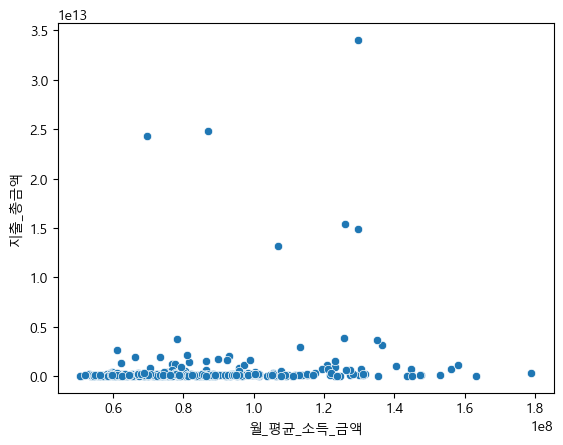

In [16]:
# 월 평균 소득이 클수록 지출이 클까?
sns.scatterplot(x=df2['월_평균_소득_금액'], y=df2['지출_총금액'])
plt.show()

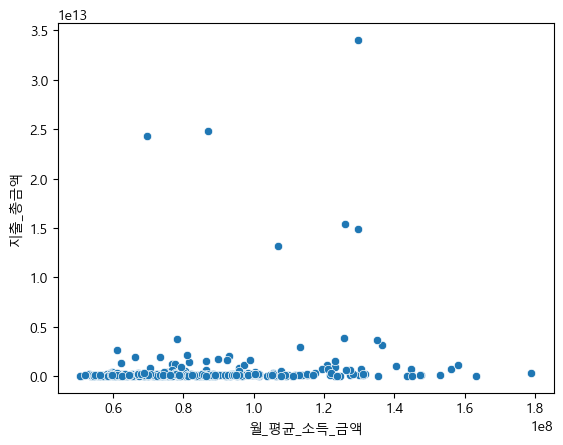

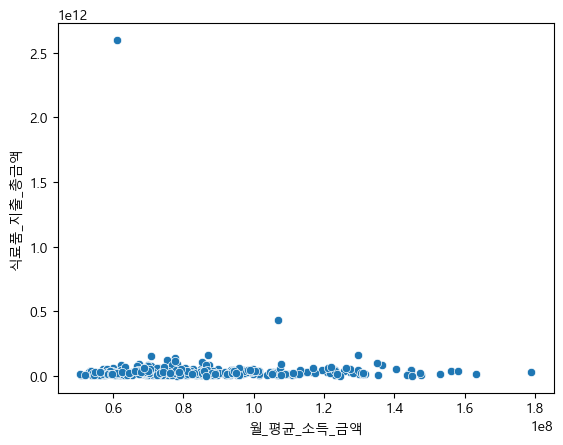

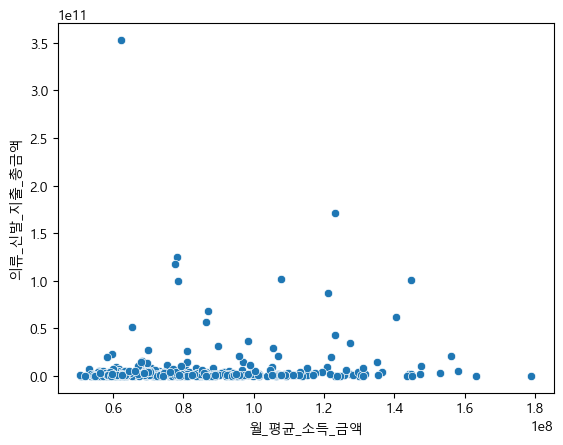

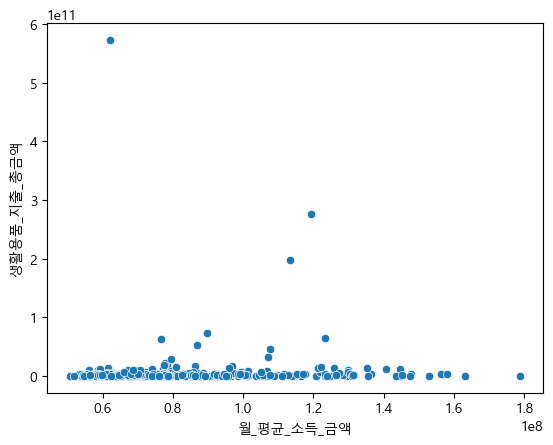

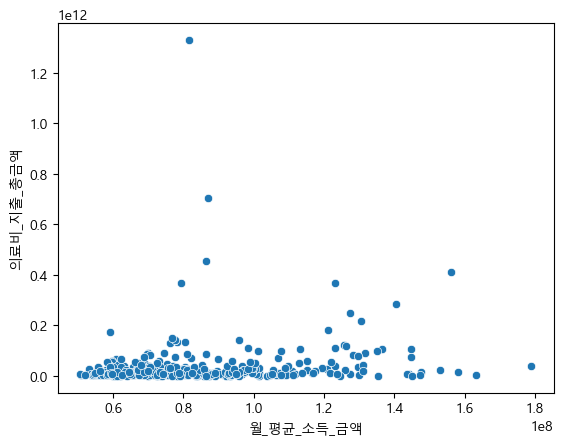

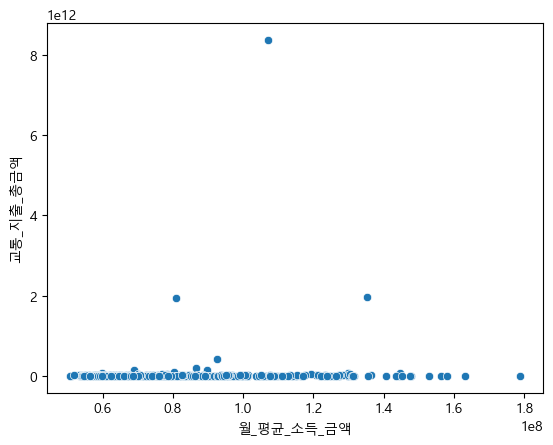

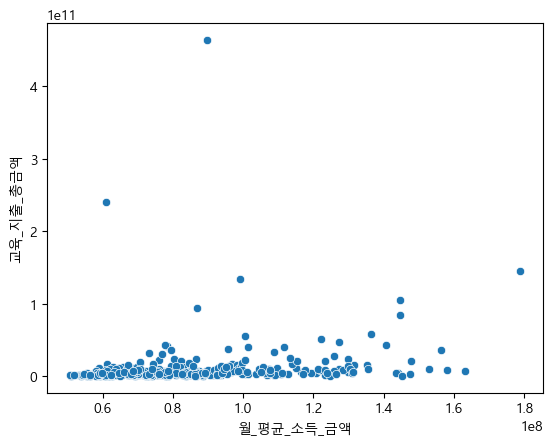

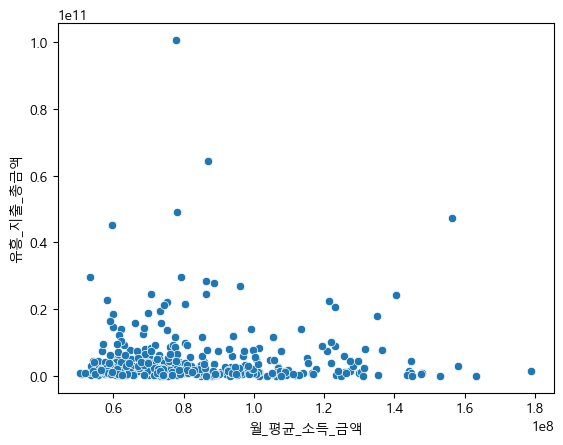

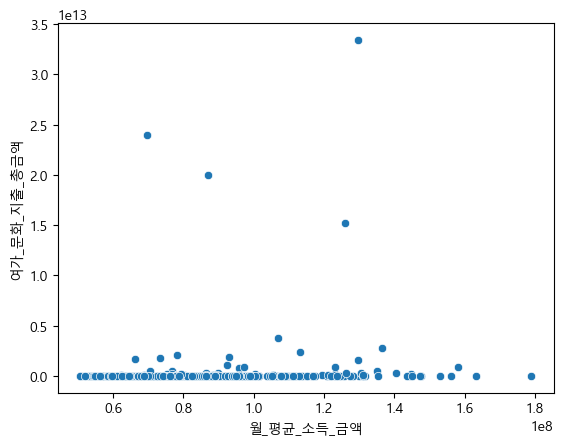

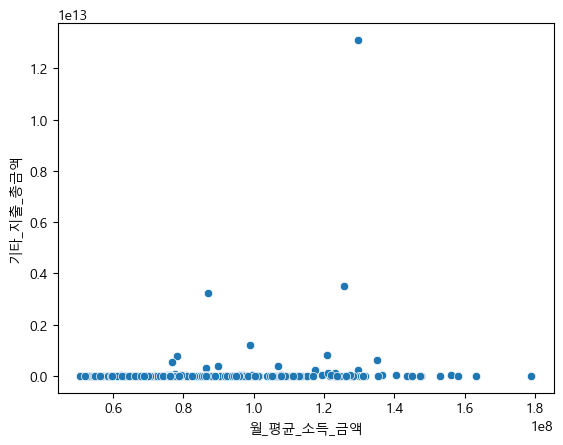

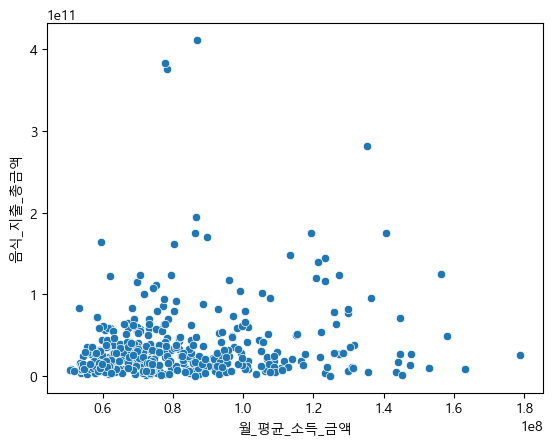

In [18]:
for i in df2.columns[2:]:
    sns.scatterplot(x=df2['월_평균_소득_금액'],y=df2[i])
    plt.show()